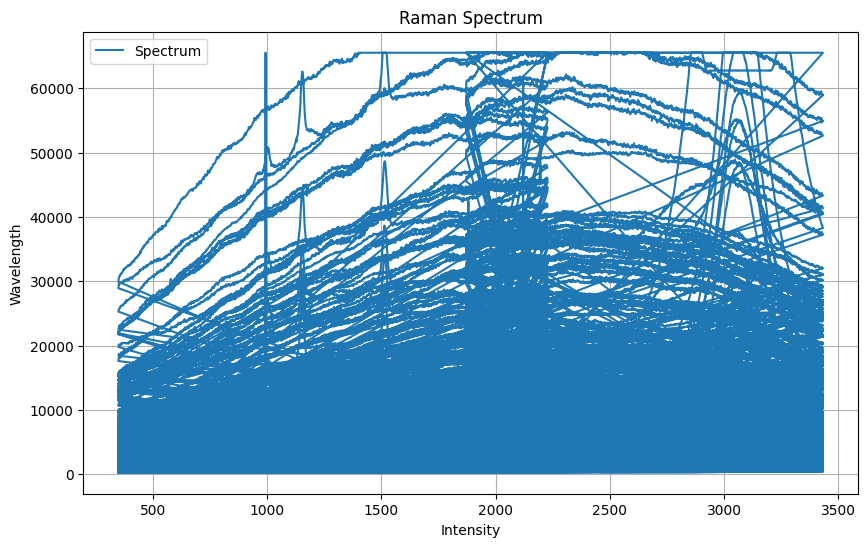

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Function to process files in a directory
def process_files(directory):
    file_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt'):
                file_path = os.path.join(root, file)
                file_paths.append(file_path)
    return file_paths

#1) FIND FILES
# Define directory
directory = '/kaggle/input/microsc-raw-txt'
file_paths = process_files(directory)

# Output directory
output_directory = '/kaggle/working/cleaned_files'
os.makedirs(output_directory, exist_ok=True)  # create output directory if it does not exist

# 2) CLEAN DATA
for file_path in file_paths:
    # Read file
    data = pd.read_csv(file_path, delimiter="\t", header=None)

    # Check if there are at least two columns
    if data.shape[1] >= 2:
        # Extract the first two columns
        cleaned_data = data.iloc[:, :2]

        # Add column names
        cleaned_data.columns = ['Wavelength', 'Intensity']

        # Save the cleaned data
        file_name = os.path.basename(file_path)
        cleaned_file_path = os.path.join(output_directory, file_name.replace('.txt', '.csv'))  # change extension to .csv
        cleaned_data.to_csv(cleaned_file_path, sep="\t", index=False)
        
        
# 3) CONCATENATE FILES
dfs = []

for filename in os.listdir(output_directory):
    if filename.endswith(".csv"):  # update condition based on file extension
        file_path = os.path.join(output_directory, filename)
        df = pd.read_csv(file_path, delimiter="\t")  # specify delimiter
        dfs.append(df)

if dfs:  # check if dfs list is not empty
    concatenated_df = pd.concat(dfs, ignore_index=True)

# Save concatenated data as CSV
concatenated_file_path = '/kaggle/working/concatenated_data.csv'
concatenated_df.to_csv(concatenated_file_path, index=False)
    
# 4) PLOT SPECTRA
def plot_spectra(df):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Wavelength'], df['Intensity'], label='Spectrum')
    plt.xlabel('Intensity')
    plt.ylabel('Wavelength')
    plt.title('Raman Spectrum')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot spectra
plot_spectra(concatenated_df)